In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import norm

In [ ]:
# Mengatur tampilan pandas agar lebih baik
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Menampilkan semua kolom dalam satu baris
pd.set_option('display.max_rows', None)  # Menampilkan semua baris

In [ ]:
bitcoin_historic_df = pd.read_csv('C:/Users/Asus/Downloads/archive/Bitcoin_History.csv')

# Konversi Change % ke format float
bitcoin_historic_df['Change %'] = bitcoin_historic_df['Change %'].str.replace('%', '').astype(float) / 100

#Mengganti nama kolom Change % menjadi Change
bitcoin_historic_df.rename(columns={'Change %': 'Change'}, inplace=True)

# Menambahkan kolom baru 'Change Classification' berdasarkan nilai 'Change'
def classify_change(row):
    if row['Change'] > 0.005:
        return 'Up'
    elif row['Change'] < -0.005:
        return 'Down'
    else:
        return 'Stable'
bitcoin_historic_df['Change Classification'] = bitcoin_historic_df.apply(classify_change, axis=1)


# Konversi kolom 'Date' ke format datetime
bitcoin_historic_df['Date'] = pd.to_datetime(bitcoin_historic_df['Date'], format='%b %d, %Y')

#Delete Vol. column
bitcoin_historic_df.drop(columns=['Vol.'], inplace=True)

print(bitcoin_historic_df.head())

#Menyimpan DataFrame ke dalam file CSV baru
bitcoin_historic_df.to_csv('C:/Users/Asus/Downloads/archive/Bitcoin_History_Updated.csv', index=False)


        Date     Price      Open      High       Low  Change Change Classification
0 2024-02-09  47,545.4  45,293.3  47,710.2  45,254.2  0.0497                    Up
1 2024-02-08  45,293.3  44,346.2  45,579.2  44,336.4  0.0215                    Up
2 2024-02-07  44,339.8  43,088.4  44,367.9  42,783.5  0.0291                    Up
3 2024-02-06  43,087.7  42,697.6  43,375.5  42,566.8  0.0091                    Up
4 2024-02-05  42,697.2  42,581.4  43,532.2  42,272.5  0.0027                Stable


In [21]:

Fix_bitcoin_historic_df = pd.read_csv('C:/Users/Asus/Downloads/archive/Bitcoin_History_Updated.csv')
BTC_FeadAndGreed = pd.read_csv('C:/Users/Asus/Downloads/archive/BTC_FearAndGreed.csv')

#Merge the two DataFrames on the 'Date' column
merged_df = pd.merge(Fix_bitcoin_historic_df, BTC_FeadAndGreed, on='Date', how='inner')
# Convert 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')

# Fill missing values with forward fill method
merged_df = merged_df.fillna(method='ffill')
print("Merge Data Missing Values:\n")
print(merged_df.isnull().sum())

#Mengganti nama kolom Price menjadi Close
merged_df.rename(columns={'Price': 'Close'}, inplace=True)

merged_df['Open'] = merged_df['Open'].astype(str).str.replace(',', '').astype(float)
merged_df['Close'] = merged_df['Close'].astype(str).str.replace(',', '').astype(float)
merged_df['Change'] = merged_df['Change'].astype(str).str.replace(',', '').astype(float)
merged_df['Low'] = merged_df['Low'].astype(str).str.replace(',', '').astype(float)
merged_df['High'] = merged_df['High'].astype(str).str.replace(',', '').astype(float)

# Save  merge file ke dalam format CSV
merged_df.to_csv('C:/Users/Asus/Downloads/archive/Merged_Bitcoin_FearAndGreed.csv', index=False)

Merge Data Missing Values:

Date                     0
Price                    0
Open                     0
High                     0
Low                      0
Change                   0
Change Classification    0
Value                    0
Value_Classification     0
BTC_Closing              0
BTC_Volume               0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_36360\4059044682.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='ffill')


Mean Close: 20562.80949602122
Median Close: 11413.3
Standard Deviation Close: 16705.843277463362
25th Percentile Close: 7842.4
50th Percentile Close: 11413.3
75th Percentile Close: 32728.1
90th Percentile Close: 47576.04000000001


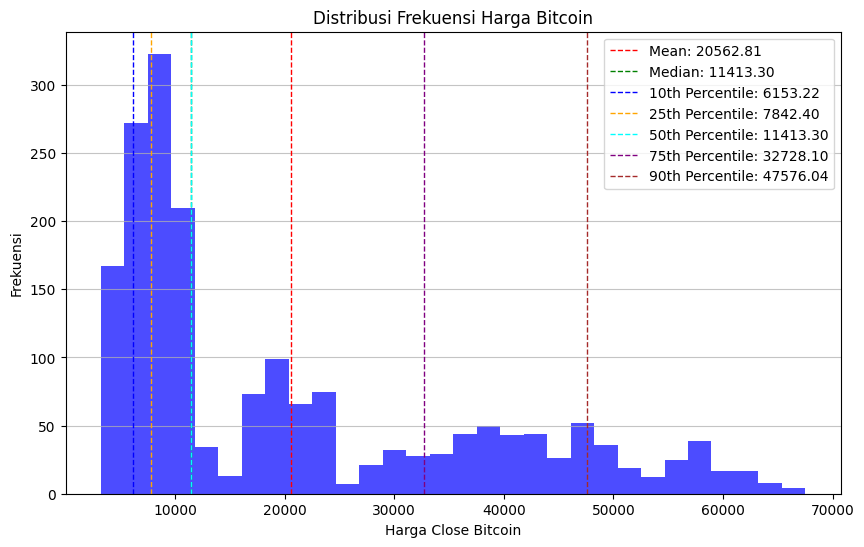

In [31]:

# Statistik Atribut close
# Menghitung mean, median, and standard deviation of the 'close' column
mean_close = merged_df['Close'].mean()
median_close = merged_df['Close'].median()
std_close = merged_df['Close'].std()
print(f"Mean Close: {mean_close}")
print(f"Median Close: {median_close}")
print(f"Standard Deviation Close: {std_close}")

# Perhtungan Persentil
percentile_10 = np.percentile(merged_df['Close'], 10)
percentile_25 = np.percentile(merged_df['Close'], 25)
percentile_50 = np.percentile(merged_df['Close'], 50)
percentile_75 = np.percentile(merged_df['Close'], 75)
percentile_90 = np.percentile(merged_df['Close'], 90)
print(f"25th Percentile Close: {percentile_25}")
print(f"50th Percentile Close: {percentile_50}")
print(f"75th Percentile Close: {percentile_75}")
print(f"90th Percentile Close: {percentile_90}")

#Distribusi frekuensi
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Close'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Frekuensi Harga Bitcoin')
plt.xlabel('Harga Close Bitcoin')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_close, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_close:.2f}')
plt.axvline(median_close, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_close:.2f}')
plt.axvline(percentile_10, color='blue', linestyle='dashed', linewidth=1, label=f'10th Percentile: {percentile_10:.2f}')
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_50, color='cyan', linestyle='dashed', linewidth=1, label=f'50th Percentile: {percentile_50:.2f}')
plt.axvline(percentile_75, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75:.2f}')
plt.axvline(percentile_90, color='brown', linestyle='dashed', linewidth=1, label=f'90th Percentile: {percentile_90:.2f}')
plt.legend()    
plt.show()

Mean Open: 20553.35198938992
Median Open: 11402.8
Standar Deviasi Open: 16706.656443728385
10th Percentile Open: 6153.64
25th Percentile Open: 7842.5
50th Percentile Open: 11402.8
75th Percentile Open: 32727.8
90th Percentile Open: 47574.380000000005


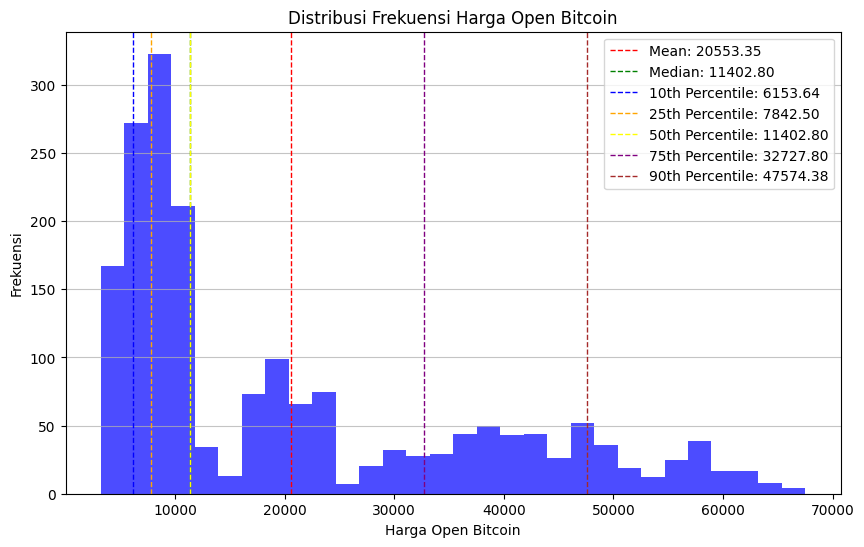

In [37]:
# Statisik Atribut Open
# Menghitung mean, median, and standard deviation of the 'Open' column
mean_open = merged_df['Open'].mean()
median_open = merged_df['Open'].median()
std_open = merged_df['Open'].std()
print(f"Mean Open: {mean_open}")
print(f"Median Open: {median_open}")
print(f"Standar Deviasi Open: {std_open}")

# Perhtungan Persentil
percentile_10_open = np.percentile(merged_df['Open'], 10)
percentile_25_open = np.percentile(merged_df['Open'], 25)
percentile_50_open = np.percentile(merged_df['Open'], 50)
percentile_75_open = np.percentile(merged_df['Open'], 75)
percentile_90_open = np.percentile(merged_df['Open'], 90)

print(f"10th Percentile Open: {percentile_10_open}")
print(f"25th Percentile Open: {percentile_25_open}")
print(f"50th Percentile Open: {percentile_50_open}")
print(f"75th Percentile Open: {percentile_75_open}")
print(f"90th Percentile Open: {percentile_90_open}")

#Distribusi frekuensi
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Open'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Frekuensi Harga Open Bitcoin')
plt.xlabel('Harga Open Bitcoin')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_open, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_open:.2f}')
plt.axvline(median_open, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_open:.2f}')
plt.axvline(percentile_10_open, color='blue', linestyle='dashed', linewidth=1, label=f'10th Percentile: {percentile_10_open:.2f}')
plt.axvline(percentile_25_open, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25_open:.2f}')
plt.axvline(percentile_50_open, color='yellow', linestyle='dashed', linewidth=1, label=f'50th Percentile: {percentile_50_open:.2f}')
plt.axvline(percentile_75_open, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75_open:.2f}')
plt.axvline(percentile_90_open, color='brown', linestyle='dashed', linewidth=1, label=f'90th Percentile: {percentile_90_open:.2f}')
plt.legend()
plt.show()

Mean Low: 19963.09379310345
Median Low: 11135.3
Standar Deviasi Low: 16184.378166698454
10th Percentile Low: 5832.7
25th Percentile Low: 7595.1
50th Percentile Low: 11135.3
75th Percentile Low: 31220.6
90th Percentile Low: 46495.220000000016


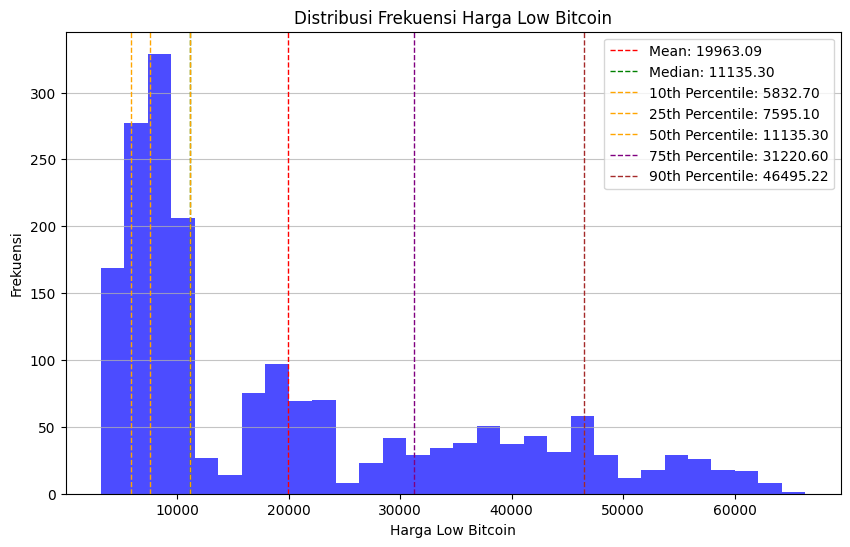

In [33]:
#Statisik Atribut Low
# Menghitung mean, median, and standard deviation of the 'Low' column
mean_low = merged_df['Low'].mean()
median_low = merged_df['Low'].median()
std_low = merged_df['Low'].std()
print(f"Mean Low: {mean_low}")
print(f"Median Low: {median_low}")
print(f"Standar Deviasi Low: {std_low}")
# Perhtungan Persentil
percentile_10_low = np.percentile(merged_df['Low'], 10)
percentile_25_low = np.percentile(merged_df['Low'], 25)
percentile_50_low = np.percentile(merged_df['Low'], 50)
percentile_75_low = np.percentile(merged_df['Low'], 75)
percentile_90_low = np.percentile(merged_df['Low'], 90)
print(f"10th Percentile Low: {percentile_10_low}")
print(f"25th Percentile Low: {percentile_25_low}")
print(f"50th Percentile Low: {percentile_50_low}")
print(f"75th Percentile Low: {percentile_75_low}")
print(f"90th Percentile Low: {percentile_90_low}")

#Distribusi frekuensi
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Low'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Frekuensi Harga Low Bitcoin')
plt.xlabel('Harga Low Bitcoin')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_low, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_low:.2f}')
plt.axvline(median_low, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_low:.2f}')
plt.axvline(percentile_10_low, color='orange', linestyle='dashed', linewidth=1, label=f'10th Percentile: {percentile_10_low:.2f}')
plt.axvline(percentile_25_low, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25_low:.2f}')
plt.axvline(percentile_50_low, color='orange', linestyle='dashed', linewidth=1, label=f'50th Percentile: {percentile_50_low:.2f}')
plt.axvline(percentile_75_low, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75_low:.2f}')
plt.axvline(percentile_90_low, color='brown', linestyle='dashed', linewidth=1, label=f'90th Percentile: {percentile_90_low:.2f}')
plt.legend()
plt.show()

Mean High: 21086.04599469496
Median High: 11677.0
Standar Deviasi High: 17160.36593238643
10th Percentile High: 6274.58
25th Percentile High: 8058.3
50th Percentile High: 11677.0
75th Percentile High: 33923.2
90th Percentile High: 48910.840000000004


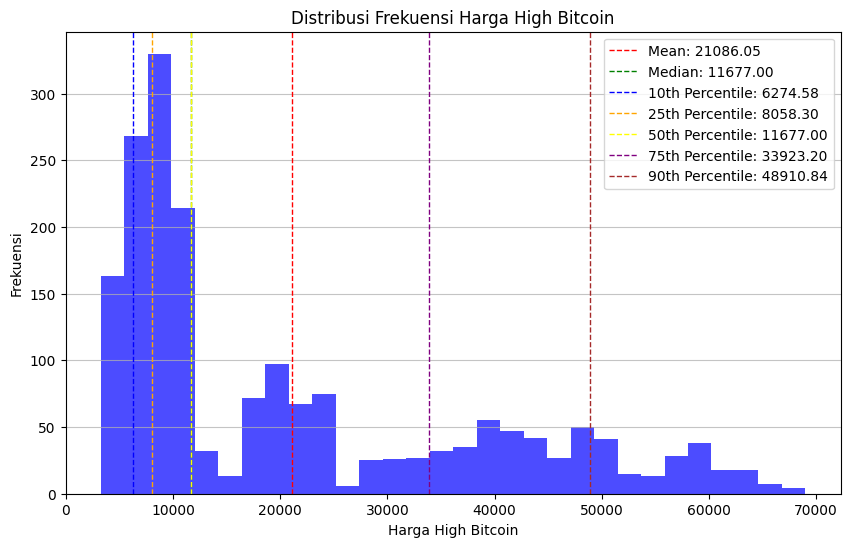

In [34]:
#Statisik Atribut High
# Menghitung mean, median, and standard deviation of the 'High' column
mean_high = merged_df['High'].mean()
median_high = merged_df['High'].median()
std_high = merged_df['High'].std()
print(f"Mean High: {mean_high}")
print(f"Median High: {median_high}")
print(f"Standar Deviasi High: {std_high}")
# Perhtungan Persentil
percentile_10_high = np.percentile(merged_df['High'], 10)
percentile_25_high = np.percentile(merged_df['High'], 25)
percentile_50_high = np.percentile(merged_df['High'], 50)
percentile_75_high = np.percentile(merged_df['High'], 75)
percentile_90_high = np.percentile(merged_df['High'], 90)
print(f"10th Percentile High: {percentile_10_high}")
print(f"25th Percentile High: {percentile_25_high}")
print(f"50th Percentile High: {percentile_50_high}")
print(f"75th Percentile High: {percentile_75_high}")
print(f"90th Percentile High: {percentile_90_high}")

#Distribusi frekuensi
plt.figure(figsize=(10, 6))
plt.hist(merged_df['High'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Frekuensi Harga High Bitcoin')
plt.xlabel('Harga High Bitcoin')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_high, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_high:.2f}')
plt.axvline(median_high, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_high:.2f}')
plt.axvline(percentile_10_high, color='blue', linestyle='dashed', linewidth=1, label=f'10th Percentile: {percentile_10_high:.2f}')
plt.axvline(percentile_25_high, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25_high:.2f}')
plt.axvline(percentile_50_high, color='yellow', linestyle='dashed', linewidth=1, label=f'50th Percentile: {percentile_50_high:.2f}')
plt.axvline(percentile_75_high, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75_high:.2f}')
plt.axvline(percentile_90_high, color='brown', linestyle='dashed', linewidth=1, label=f'90th Percentile: {percentile_90_high:.2f}')
plt.legend()
plt.show()

Mean Change: 0.0012827586206896541
Median Change: 0.0005
Standar Deviasi Change: 0.03813308651948783
10th Percentile Change: -0.039060000000000004
25th Percentile Change: -0.0155
50th Percentile Change: 0.0005
75th Percentile Change: 0.0178
90th Percentile Change: 0.04275999999999997


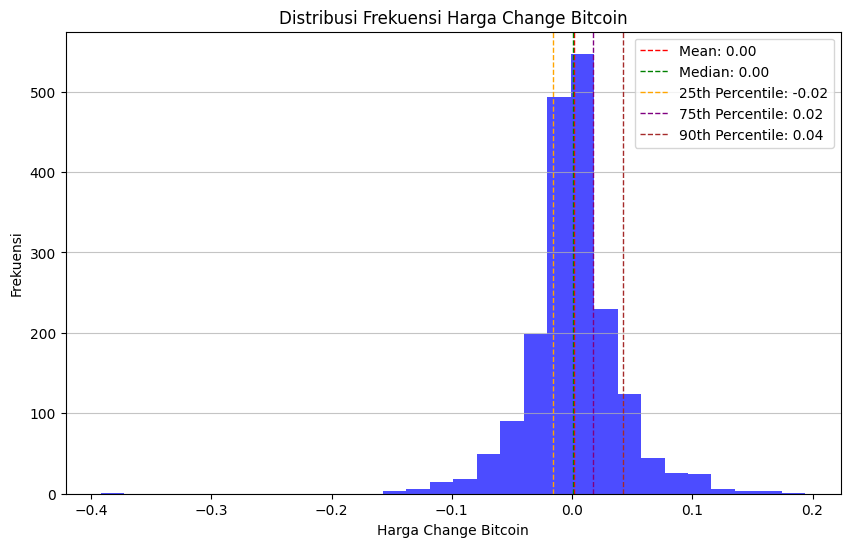

In [ ]:
#Statisik Atribut Change
# Menghitung mean, median, and standard deviation of the 'Change' column
mean_change = merged_df['Change'].mean()
median_change = merged_df['Change'].median()
std_change = merged_df['Change'].std()
print(f"Mean Change: {mean_change}")
print(f"Median Change: {median_change}")
print(f"Standar Deviasi Change: {std_change}")
# Perhtungan Persentil
percentile_10_change = np.percentile(merged_df['Change'], 10)
percentile_25_change = np.percentile(merged_df['Change'], 25)
percentile_50_change = np.percentile(merged_df['Change'], 50)
percentile_75_change = np.percentile(merged_df['Change'], 75)
percentile_90_change = np.percentile(merged_df['Change'], 90)
print(f"10th Percentile Change: {percentile_10_change}")
print(f"25th Percentile Change: {percentile_25_change}")
print(f"50th Percentile Change: {percentile_50_change}")
print(f"75th Percentile Change: {percentile_75_change}")
print(f"90th Percentile Change: {percentile_90_change}")
#Distribusi frekuensi
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Change'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Frekuensi Harga Change Bitcoin')
plt.xlabel('Harga Change Bitcoin')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_change, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_change:.2f}')
plt.axvline(median_change, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_change:.2f}')
plt.axvline(percentile_10_change, color='blue', linestyle='dashed', linewidth=1, label=f'10th Percentile: {percentile_10_change:.2f}')
plt.axvline(percentile_25_change, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25_change:.2f}')
plt.axvline(percentile_50_change, color='yellow', linestyle='dashed', linewidth=1, label=f'50th Percentile: {percentile_50_change:.2f}')
plt.axvline(percentile_75_change, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75_change:.2f}')
plt.axvline(percentile_90_change, color='brown', linestyle='dashed', linewidth=1, label=f'90th Percentile: {percentile_90_change:.2f}')
plt.legend()
plt.show()

Jumlah setiap kategori Change Classification:
Change Classification
Up        795
Down      747
Stable    343
Name: count, dtype: int64


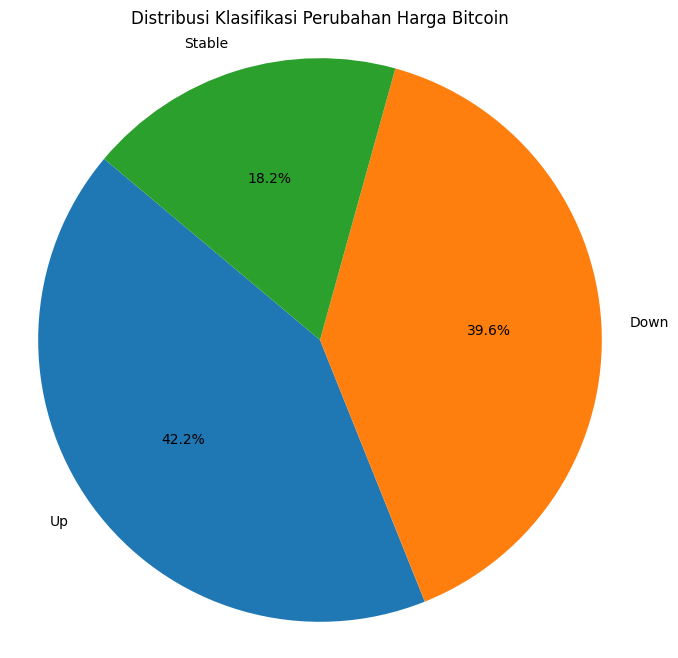

In [30]:
# Statisik Atribut Change Classification
# Menghitung jumlah setiap kategori
change_classification_counts = merged_df['Change Classification'].value_counts()
print("Jumlah setiap kategori Change Classification:")
print(change_classification_counts)
# Pie chart untuk Change Classification
plt.figure(figsize=(8, 8))
plt.pie(change_classification_counts, labels=change_classification_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Klasifikasi Perubahan Harga Bitcoin') 
plt.axis('equal')  
plt.show()

Mean Value: 42.36816976127321
Median Value: 39.0
Standar Deviasi Value: 22.079480177233698
10th Percentile Value: 18.0
25th Percentile Value: 24.0
50th Percentile Value: 39.0
75th Percentile Value: 56.0
90th Percentile Value: 75.0


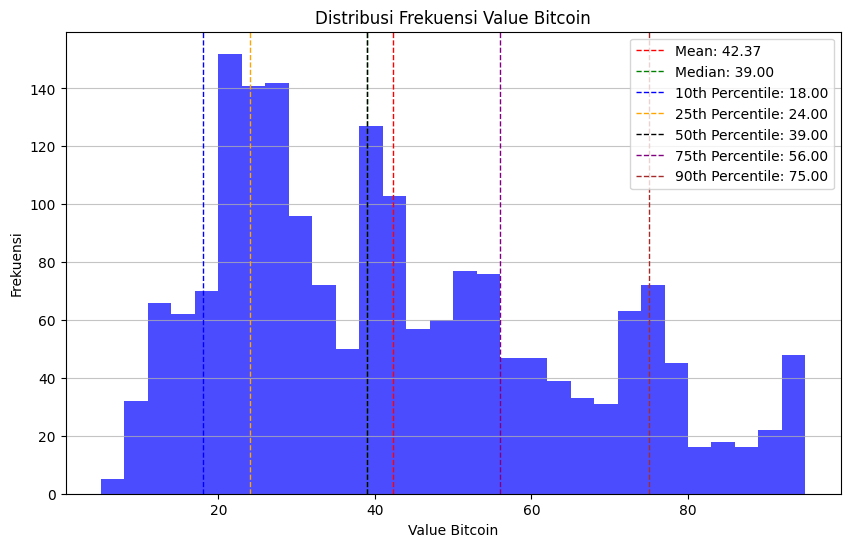

In [35]:
#Statisik Atribut Value
# Menghitung mean, median, and standard deviation of the 'Value' column
mean_value = merged_df['Value'].mean()
median_value = merged_df['Value'].median()
std_value = merged_df['Value'].std()
print(f"Mean Value: {mean_value}")
print(f"Median Value: {median_value}")
print(f"Standar Deviasi Value: {std_value}")
# Perhtungan Persentil
percentile_10_value = np.percentile(merged_df['Value'], 10)
percentile_25_value = np.percentile(merged_df['Value'], 25)
percentile_50_value = np.percentile(merged_df['Value'], 50)
percentile_75_value = np.percentile(merged_df['Value'], 75)
percentile_90_value = np.percentile(merged_df['Value'], 90)
print(f"10th Percentile Value: {percentile_10_value}")
print(f"25th Percentile Value: {percentile_25_value}")
print(f"50th Percentile Value: {percentile_50_value}")
print(f"75th Percentile Value: {percentile_75_value}")
print(f"90th Percentile Value: {percentile_90_value}")
#Distribusi frekuensi
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Value'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Frekuensi Value Bitcoin')
plt.xlabel('Value Bitcoin')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(percentile_10_value, color='blue', linestyle='dashed', linewidth=1, label=f'10th Percentile: {percentile_10_value:.2f}')
plt.axvline(percentile_25_value, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25_value:.2f}')
plt.axvline(percentile_50_value, color='black', linestyle='dashed', linewidth=1, label=f'50th Percentile: {percentile_50_value:.2f}')
plt.axvline(percentile_75_value, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75_value:.2f}')
plt.axvline(percentile_90_value, color='brown', linestyle='dashed', linewidth=1, label=f'90th Percentile: {percentile_90_value:.2f}')
plt.legend()
plt.show()
#Statisik Atribut Fear and Greed

Jumlah setiap kategori Fear and Greed:
Value_Classification
Fear             647
Extreme Fear     528
Greed            338
Neutral          187
Extreme Greed    185
Name: count, dtype: int64


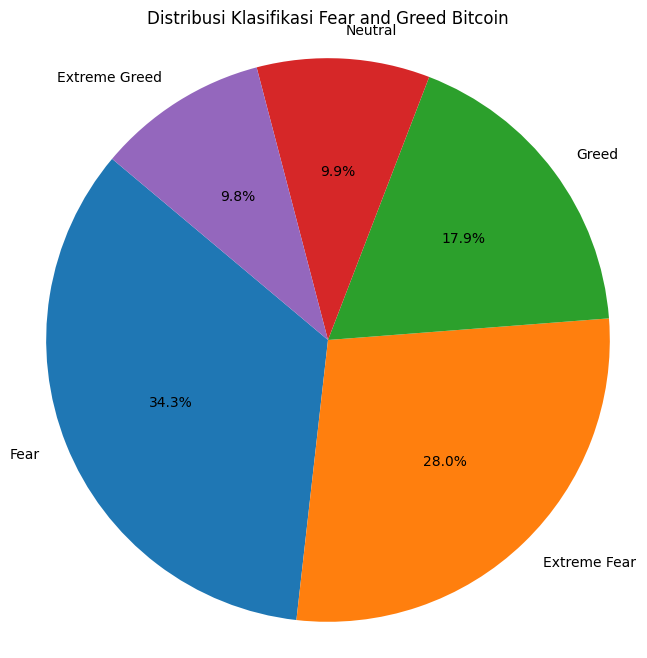

In [39]:
#Statisik Atribut Value Classification
# Menghitung jumlah setiap kategori
fear_and_greed_counts = merged_df['Value_Classification'].value_counts()
print("Jumlah setiap kategori Fear and Greed:")
print(fear_and_greed_counts)
# Pie chart untuk Fear and Greed
plt.figure(figsize=(8, 8))
plt.pie(fear_and_greed_counts, labels=fear_and_greed_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Klasifikasi Fear and Greed Bitcoin')
plt.axis('equal')
plt.show()

Mean BTC Volume: 26766602542.740585
Median BTC Volume: 24598943708.0
Standar Deviasi BTC Volume: 19537851317.73078
10th Percentile BTC Volume: 5047302531.2
25th Percentile BTC Volume: 13731844223.0
50th Percentile BTC Volume: 24598943708.0
75th Percentile BTC Volume: 35690014104.0
90th Percentile BTC Volume: 49047937803.0


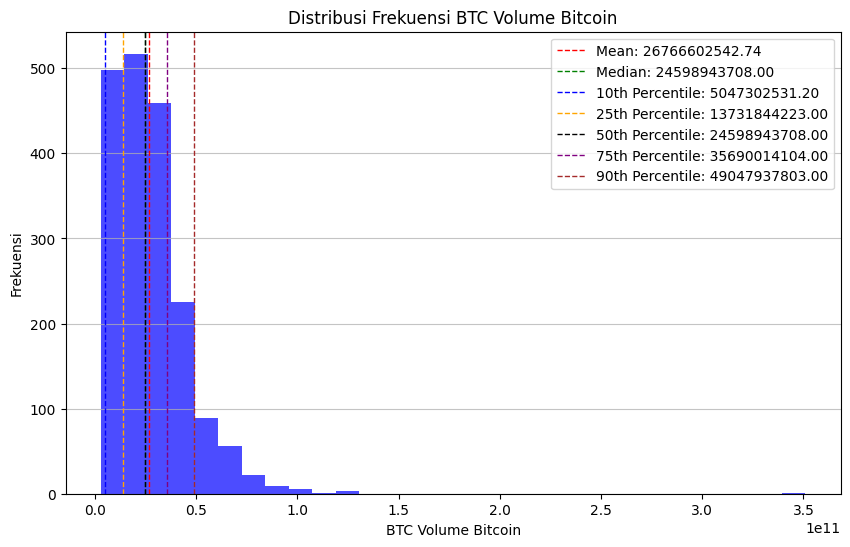

In [40]:
#Statisik Atribut BTC_Volume
# Menghitung mean, median, and standard deviation of the 'BTC_Volume' column
mean_btc_volume = merged_df['BTC_Volume'].mean()
median_btc_volume = merged_df['BTC_Volume'].median()
std_btc_volume = merged_df['BTC_Volume'].std()
print(f"Mean BTC Volume: {mean_btc_volume}")
print(f"Median BTC Volume: {median_btc_volume}")
print(f"Standar Deviasi BTC Volume: {std_btc_volume}")
# Perhtungan Persentil
percentile_10_btc_volume = np.percentile(merged_df['BTC_Volume'], 10)
percentile_25_btc_volume = np.percentile(merged_df['BTC_Volume'], 25)
percentile_50_btc_volume = np.percentile(merged_df['BTC_Volume'], 50)
percentile_75_btc_volume = np.percentile(merged_df['BTC_Volume'], 75)
percentile_90_btc_volume = np.percentile(merged_df['BTC_Volume'], 90)
print(f"10th Percentile BTC Volume: {percentile_10_btc_volume}")
print(f"25th Percentile BTC Volume: {percentile_25_btc_volume}")
print(f"50th Percentile BTC Volume: {percentile_50_btc_volume}")
print(f"75th Percentile BTC Volume: {percentile_75_btc_volume}")
print(f"90th Percentile BTC Volume: {percentile_90_btc_volume}")
#Distribusi frekuensi
plt.figure(figsize=(10, 6))
plt.hist(merged_df['BTC_Volume'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Frekuensi BTC Volume Bitcoin')
plt.xlabel('BTC Volume Bitcoin')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_btc_volume, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_btc_volume:.2f}')
plt.axvline(median_btc_volume, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_btc_volume:.2f}')
plt.axvline(percentile_10_btc_volume, color='blue', linestyle='dashed', linewidth=1, label=f'10th Percentile: {percentile_10_btc_volume:.2f}')
plt.axvline(percentile_25_btc_volume, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25_btc_volume:.2f}')
plt.axvline(percentile_50_btc_volume, color='black', linestyle='dashed', linewidth=1, label=f'50th Percentile: {percentile_50_btc_volume:.2f}')
plt.axvline(percentile_75_btc_volume, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75_btc_volume:.2f}')
plt.axvline(percentile_90_btc_volume, color='brown', linestyle='dashed', linewidth=1, label=f'90th Percentile: {percentile_90_btc_volume:.2f}')
plt.legend()
plt.show()